# 0.0 Imports

In [247]:
import pandas       as pd
import numpy        as np
import seaborn      as sns

import sweetviz

from tabulate                import tabulate
from scipy                   import stats
from matplotlib              import pyplot          as plt
from matplotlib.pyplot       import figure

from IPython.core.display    import HTML
from IPython.display         import Image

from sklearn.model_selection import StratifiedKFold , train_test_split

from sklearn                 import preprocessing   as pp
from sklearn                 import model_selection as mms

## 0.1 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

sns.set()

In [3]:
jupyter_settings()

## 0.2 Loading Data


In [4]:
df_train_raw = pd.read_csv("train.csv",low_memory = False)
df_test_raw = pd.read_csv("test.csv",low_memory = False)


In [5]:
df_train_raw.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,uid,bank_account
0,Rwanda,2016,uniqueid_4858,Rural,Yes,6,45,Male,Head of Household,Divorced/Seperated,Primary education,Farming and Fishing,Rwanda_uniqueid_4858,No
1,Tanzania,2017,uniqueid_3015,Urban,No,4,33,Female,Head of Household,Single/Never Married,Primary education,Self employed,Tanzania_uniqueid_3015,No
2,Rwanda,2016,uniqueid_103,Rural,Yes,7,43,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing,Rwanda_uniqueid_103,No
3,Rwanda,2016,uniqueid_4582,Rural,No,6,35,Female,Head of Household,Married/Living together,Primary education,Farming and Fishing,Rwanda_uniqueid_4582,No
4,Tanzania,2017,uniqueid_2854,Urban,Yes,2,30,Male,Head of Household,Single/Never Married,Primary education,Informally employed,Tanzania_uniqueid_2854,No


In [6]:
df_test_raw.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,uid
0,Rwanda,2016,uniqueid_625,Rural,Yes,7,40,Male,Head of Household,Married/Living together,No formal education,Informally employed,Rwanda_uniqueid_625
1,Rwanda,2016,uniqueid_1561,Rural,Yes,3,24,Male,Child,Single/Never Married,Secondary education,Farming and Fishing,Rwanda_uniqueid_1561
2,Rwanda,2016,uniqueid_4806,Urban,Yes,3,25,Female,Spouse,Married/Living together,Primary education,Farming and Fishing,Rwanda_uniqueid_4806
3,Tanzania,2017,uniqueid_4902,Urban,Yes,1,35,Female,Head of Household,Married/Living together,Primary education,Self employed,Tanzania_uniqueid_4902
4,Rwanda,2016,uniqueid_980,Rural,Yes,3,60,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing,Rwanda_uniqueid_980


# 1.0 Data Description

In [7]:
df1 = df_train_raw.copy()

In [8]:
df_train_raw.columns

Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'uid', 'bank_account'],
      dtype='object')

In [9]:
#df1.drop("uid", axis=1, inplace=True)

In [10]:
df1.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,uid,bank_account
0,Rwanda,2016,uniqueid_4858,Rural,Yes,6,45,Male,Head of Household,Divorced/Seperated,Primary education,Farming and Fishing,Rwanda_uniqueid_4858,No
1,Tanzania,2017,uniqueid_3015,Urban,No,4,33,Female,Head of Household,Single/Never Married,Primary education,Self employed,Tanzania_uniqueid_3015,No
2,Rwanda,2016,uniqueid_103,Rural,Yes,7,43,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing,Rwanda_uniqueid_103,No
3,Rwanda,2016,uniqueid_4582,Rural,No,6,35,Female,Head of Household,Married/Living together,Primary education,Farming and Fishing,Rwanda_uniqueid_4582,No
4,Tanzania,2017,uniqueid_2854,Urban,Yes,2,30,Male,Head of Household,Single/Never Married,Primary education,Informally employed,Tanzania_uniqueid_2854,No


## 1.2 Data Dimensions

In [11]:
print("Number of Rows:{}".format(df1.shape[0]))
print("Number of Cols:{}".format(df1.shape[1]))

Number of Rows:11762
Number of Cols:14


## 1.3 Data Types

In [12]:
df1.dtypes

country                   object
year                       int64
uniqueid                  object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
uid                       object
bank_account              object
dtype: object

## 1.4 Check NA

In [13]:
df1.isna().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
uid                       0
bank_account              0
dtype: int64

## 1.5 Change Types (Estatística Descritiva)

In [14]:
df1.dtypes

country                   object
year                       int64
uniqueid                  object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
uid                       object
bank_account              object
dtype: object

## 1.7 Descriptive Statistical


In [15]:
#outra forma de separar o atributos numericos e categóricos

df1_num=df1.select_dtypes(include=['int64', 'float64'])
df1_cat=df1.select_dtypes(exclude=['int64', 'float64',])


In [16]:
#númerico
num_attributes = df1[["year", "household_size", "age_of_respondent"]]
#categórico
cat_attributes = df1[["country", "uniqueid", "location_type", "cellphone_access", "gender_of_respondent", "relationship_with_head", "marital_status", "education_level", "job_type", "bank_account"]]


In [17]:
num_attributes.sample(5)

,year,household_size,age_of_respondent
8286,2018,3,57
3967,2018,1,64
9727,2016,5,42
2527,2017,2,60
11244,2018,13,19


In [18]:
cat_attributes.sample(5)

,country,uniqueid,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
3685,Rwanda,uniqueid_3827,Rural,Yes,Male,Child,Single/Never Married,Primary education,Informally employed,No
3556,Rwanda,uniqueid_3791,Rural,Yes,Female,Spouse,Married/Living together,Primary education,Remittance Dependent,No
4343,Rwanda,uniqueid_5423,Rural,Yes,Female,Child,Single/Never Married,Primary education,Informally employed,No
4276,Rwanda,uniqueid_4188,Rural,Yes,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing,No
124,Kenya,uniqueid_4527,Urban,Yes,Female,Head of Household,Single/Never Married,Primary education,Informally employed,No


### 1.7.1 Numerical Attributes


In [19]:
# noção de negócios (métricas"m" e erros)

#tendência central - Mean e Median
#mean
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
#median
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#disperção - Std, Min, MAx, Range, Skew, Kurtosis
#std
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
#min
d2 = pd.DataFrame(num_attributes.apply(min)).T
#max
d3 = pd.DataFrame(num_attributes.apply(max)).T

#range
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T
#skew
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
#kurtosis
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenar a lista na ordem desejada
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
#nome das colunas
m.columns = (["attributes", "min", " max", "range","mean" ,"median" ,"std" ,"skew" ,"kurtosis"])
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,year,2016.0,2018.0,2.0,2016.983336,2017.0,0.848633,0.031654,-1.610921
1,household_size,1.0,21.0,20.0,3.793913,3.0,2.225328,1.004163,1.529882
2,age_of_respondent,16.0,100.0,84.0,38.602364,35.0,16.333929,0.851705,0.161847


In [20]:
#Outra forma de pegar as medidas centrais

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
year,11762.0,2016.983336,0.848669,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,11762.0,3.793913,2.225423,1.0,2.0,3.0,5.0,21.0
age_of_respondent,11762.0,38.602364,16.334624,16.0,26.0,35.0,48.0,100.0


In [ ]:
sns.distplot( df1["age_of_respondent"])

In [ ]:
plt.subplot(3, 2, 1)
sns.countplot(df1["country"]);

plt.subplot(3, 2, 2)
sns.countplot(df1["uniqueid"]);

plt.subplot(3, 2, 3)
sns.countplot(df1["location_type"]);

plt.subplot(3, 2, 4)
sns.countplot(df1["cellphone_access"]);

plt.subplot(3, 2, 5)
sns.countplot(df1["gender_of_respondent"]);

plt.subplot(3, 2, 6)
sns.countplot(df1["relationship_with_head"]);

plt.subplot(3, 2, 7)
sns.countplot(df1["marital_status"]);

plt.subplot(3, 2, 8)
sns.countplot(df1["education_level"]);

plt.subplot(3, 2, 9)
sns.countplot(df1["job_type"]);

plt.subplot(3, 2, 10)
sns.countplot(df1["bank_account"]);

/Users/raquelrocha/opt/anaconda3/envs/inclusaofinanceira/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


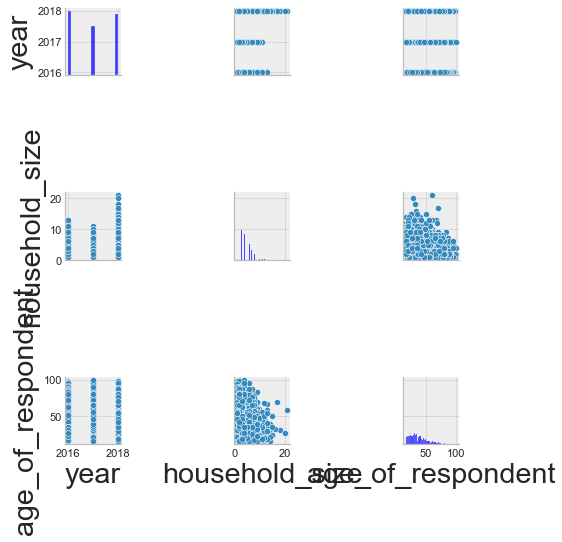

In [21]:
# sns.pairplot(num_attributes)

#df = sns.load_dataset("df_train")
#sns.pairplot(df, hue="species")
data = pd.read_csv("train.csv")  
sns.pairplot(data) 

/Users/raquelrocha/opt/anaconda3/envs/inclusaofinanceira/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


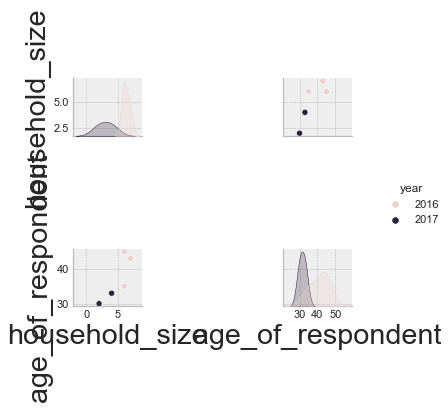

In [22]:
data = pd.read_csv("train.csv")  
sns.pairplot(data.head(), hue = 'year')

# 2.0 Feature Engineering
#### (criar as variáveis, criar lista de hipóteses e validar as hipóteses)

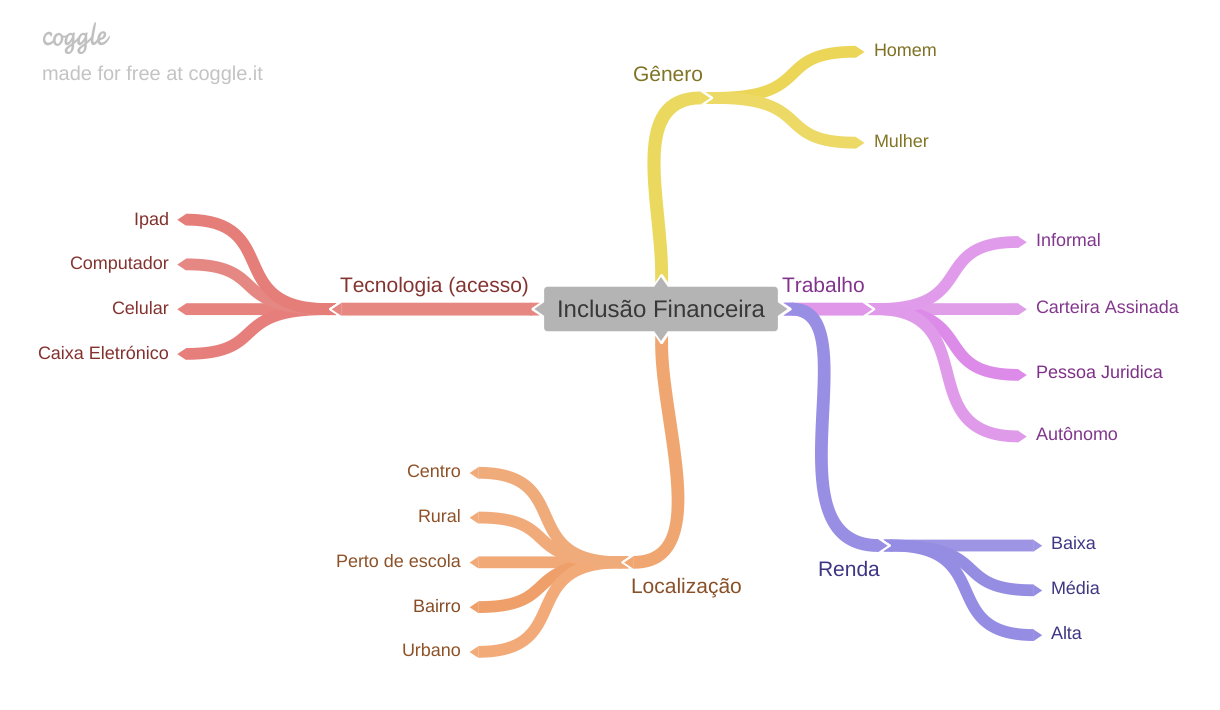

In [23]:
#Mind Map
Image("/Users/raquelrocha/Documents/ProjetosComunidadeDS/HackDay2022/img/Inclusao_Financeira_MindMap.png")

In [24]:
df2 = df1.copy()

## 2.2 Criação das Hipóteses


#### Idade

1- Jovens até 30 anos tem mais acesso ao celular do que adultos acima de 30 anos.

2- Os jovens de 15 à 29 anos são mais propensos a utilizar serviços financeiros do que adultos de 30 à 60.

3- Homens jovens de 15 à 29 anos utilizam mais serviços do que mulheres jovens

#### gêneros

4- Mulheres de localidade rural/ interior possuem menos acesso aos serviços financeiros.

5- Homens de localidade rural/interior tem mais acesso a serviços bancários, do que mulheres de cidade grande/urbana

#### Renda financeira

6- A distribuição de renda da população entre os países da África é um fator que restringe o acesso aos bancos.

7- Pessoas que não tem emprego formal tem menos interesse aos serviços financeiros.


8- Quanto maior o tamanho da casa do indivíduo, faz com que tenha mais propensão a ter uma conta bancaria

#### Acesso Celular

9- Pessoas com menos acesso ao celular tem menos aquisição a conta em bancos.

#### Escolaridade

10- Pessoas com nível de instrução escolar maior, são mais propensas a adquirir serviços financeiros.

#### Situação civil

11- Pessoas casadas tendem a ter serviços financeiros.

## 2.3 Feature Engineering


In [25]:
df2.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,uid,bank_account
0,Rwanda,2016,uniqueid_4858,Rural,Yes,6,45,Male,Head of Household,Divorced/Seperated,Primary education,Farming and Fishing,Rwanda_uniqueid_4858,No
1,Tanzania,2017,uniqueid_3015,Urban,No,4,33,Female,Head of Household,Single/Never Married,Primary education,Self employed,Tanzania_uniqueid_3015,No
2,Rwanda,2016,uniqueid_103,Rural,Yes,7,43,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing,Rwanda_uniqueid_103,No
3,Rwanda,2016,uniqueid_4582,Rural,No,6,35,Female,Head of Household,Married/Living together,Primary education,Farming and Fishing,Rwanda_uniqueid_4582,No
4,Tanzania,2017,uniqueid_2854,Urban,Yes,2,30,Male,Head of Household,Single/Never Married,Primary education,Informally employed,Tanzania_uniqueid_2854,No


In [255]:
df2.tail()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,uid,bank_account
11757,Rwanda,2016,uniqueid_5897,Rural,1,4,27,Female,Spouse,Married/Living together,Primary education,Farming and Fishing,Rwanda_uniqueid_5897,0
11758,Uganda,2018,uniqueid_153,Rural,1,9,40,Female,Spouse,Married/Living together,Primary education,Self employed,Uganda_uniqueid_153,0
11759,Kenya,2018,uniqueid_5391,Rural,1,4,35,Female,Head of Household,Widowed,Tertiary education,Formally employed Government,Kenya_uniqueid_5391,1
11760,Kenya,2018,uniqueid_861,Urban,1,2,42,Male,Head of Household,Married/Living together,Tertiary education,Self employed,Kenya_uniqueid_861,1
11761,Tanzania,2017,uniqueid_993,Urban,0,2,80,Male,Head of Household,Single/Never Married,No formal education,Self employed,Tanzania_uniqueid_993,0


In [26]:
#Bank Acount (colocar em valores 0 e 1)
df2["bank_account"] = df2["bank_account"].apply(lambda x: 1 if x =="Yes" else 0)

#cellphone_access
df2["cellphone_access"] = df2["cellphone_access"].apply(lambda x: 1 if x =="Yes" else 0)


# 3.0 Filtragem de Variáveis

In [27]:
df3 = df2.copy()

# 4.0 Análise Exploratória dos Dados - EDA 

In [28]:
df4 = df3.copy()

### SweetViz

In [ ]:
# Gerando relatorio  
relatorio = sweetviz.analyze(df4)

In [ ]:
relatorio.show_html('relatorio.html')

## 4.1 Análise univariada

In [29]:
df4.columns

Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'uid', 'bank_account'],
      dtype='object')

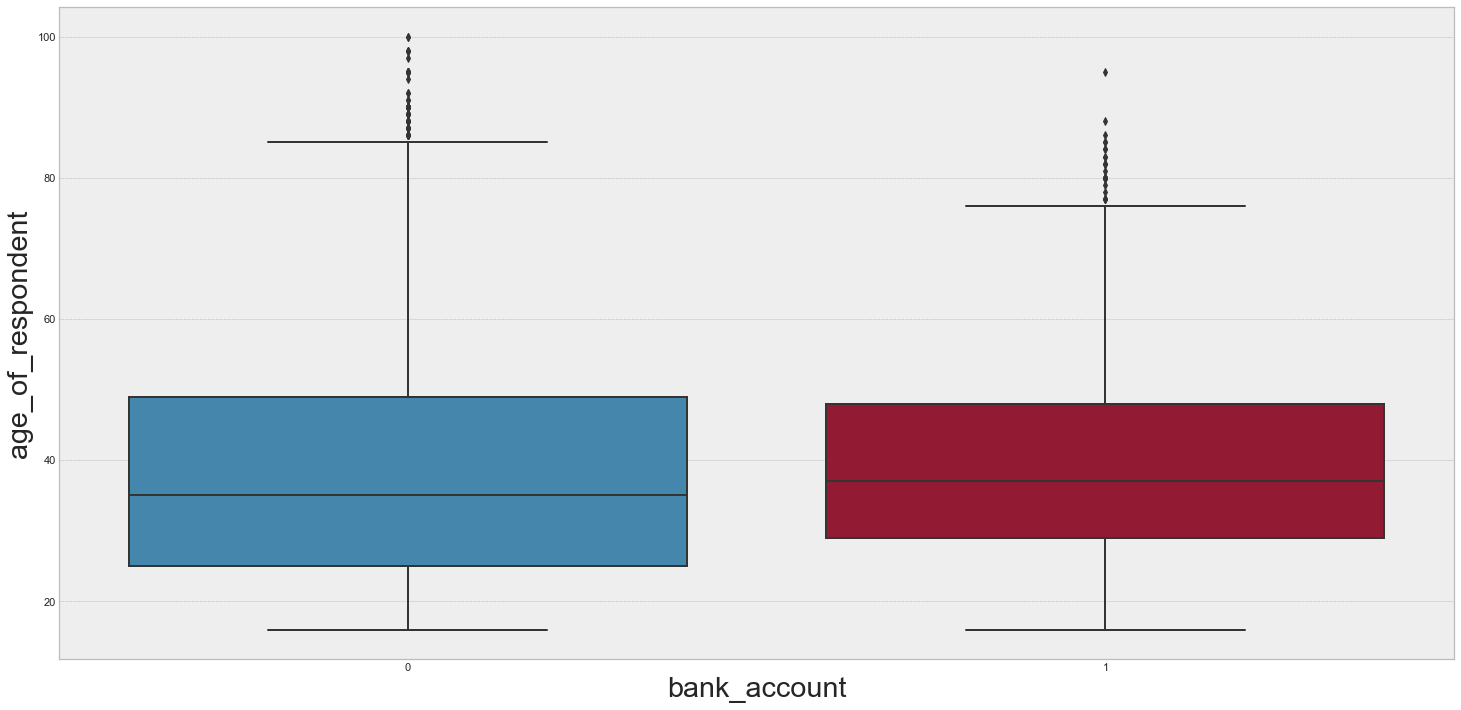

In [30]:
#age_of_respondent
sns.boxplot(x="bank_account", y="age_of_respondent", data=df4)

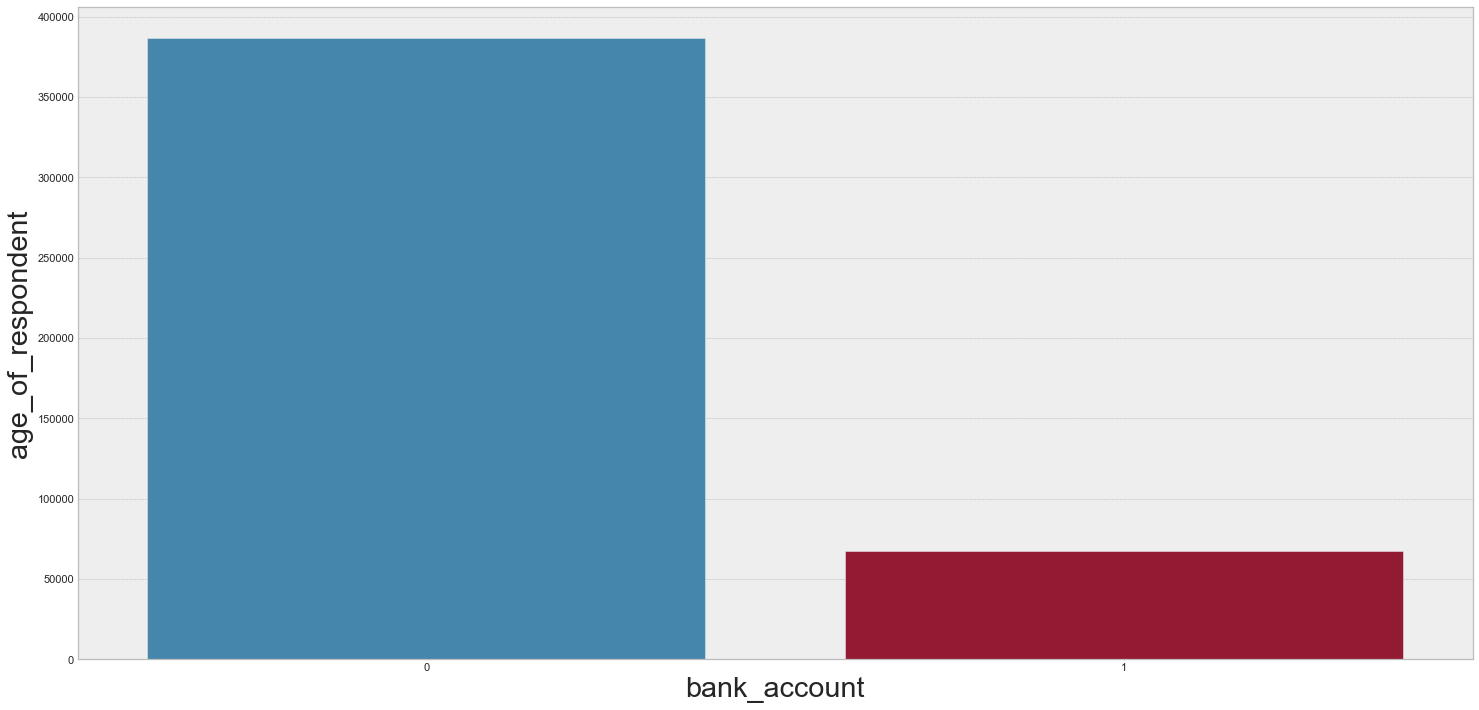

In [31]:
aux2 = df4[["age_of_respondent", "bank_account"]].groupby("bank_account").sum().reset_index()
sns.barplot(x="bank_account", y="age_of_respondent", data=aux2)

/Users/raquelrocha/opt/anaconda3/envs/inclusaofinanceira/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


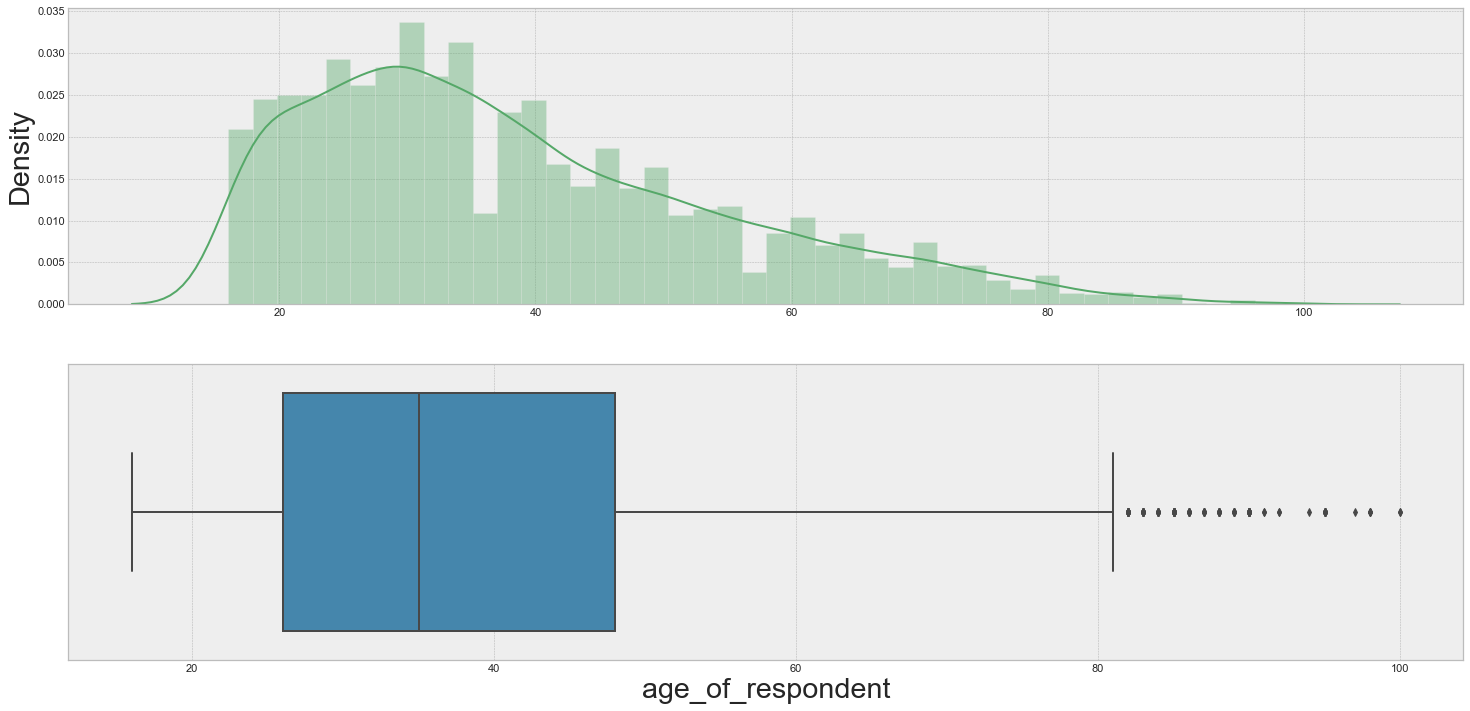

In [32]:
plt.subplot(2,1,1)
sns.set_color_codes()
sns.distplot(x=df1['age_of_respondent'], color='g');

plt.subplot(2,1,2)
sns.boxplot(x=df1['age_of_respondent']);

In [33]:
#education_level


In [34]:
#location_type


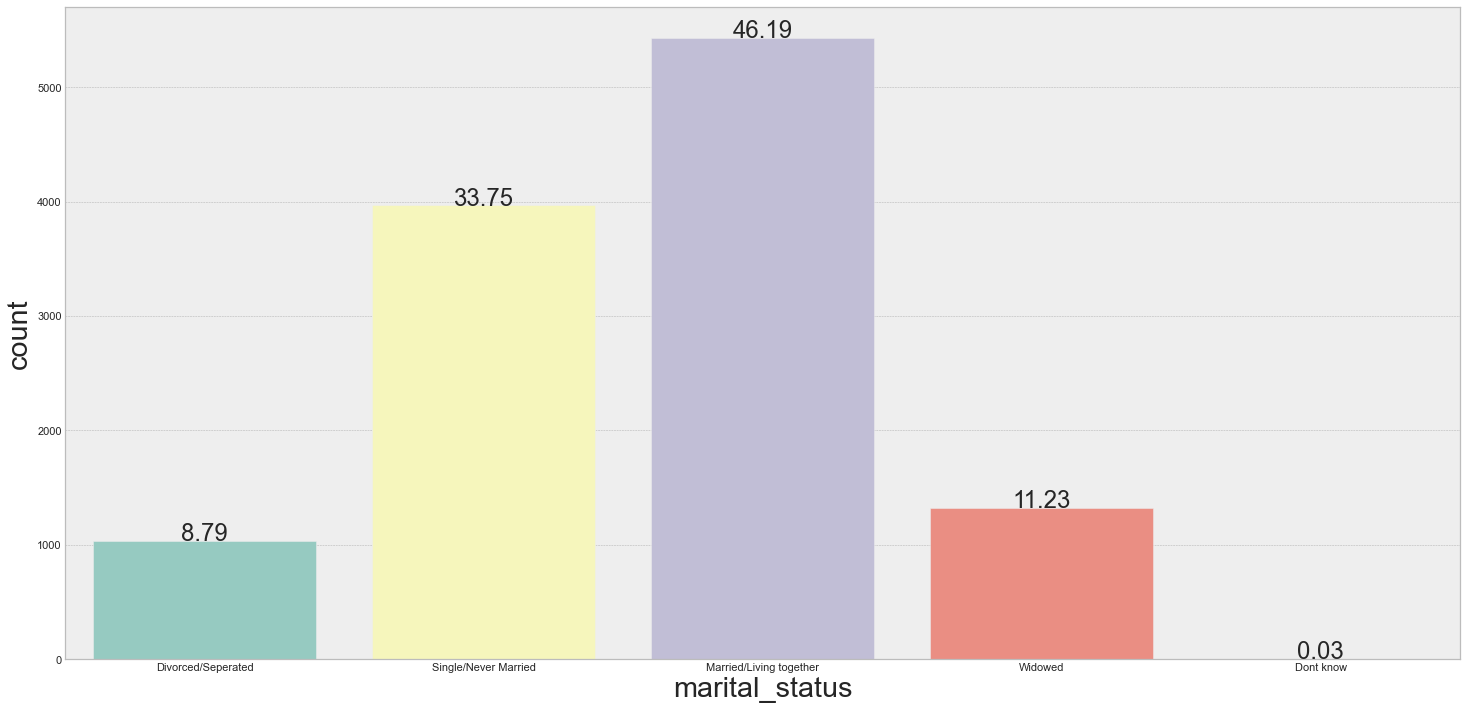

In [260]:
#marital_status
ax18 = sns.countplot(x="marital_status", data=df4, palette="Set3")
total =len(df4["marital_status"])
graphic_percentage(ax18,total)

In [264]:
# fazer transformação para numérico
aux1 = df4[["marital_status","bank_account"]].groupby("marital_status").sum().reset_index()
sns.barplot(x="marital_status",y="bank_account",data=aux1);

TypeError: Neither the `x` nor `y` variable appears to be numeric.

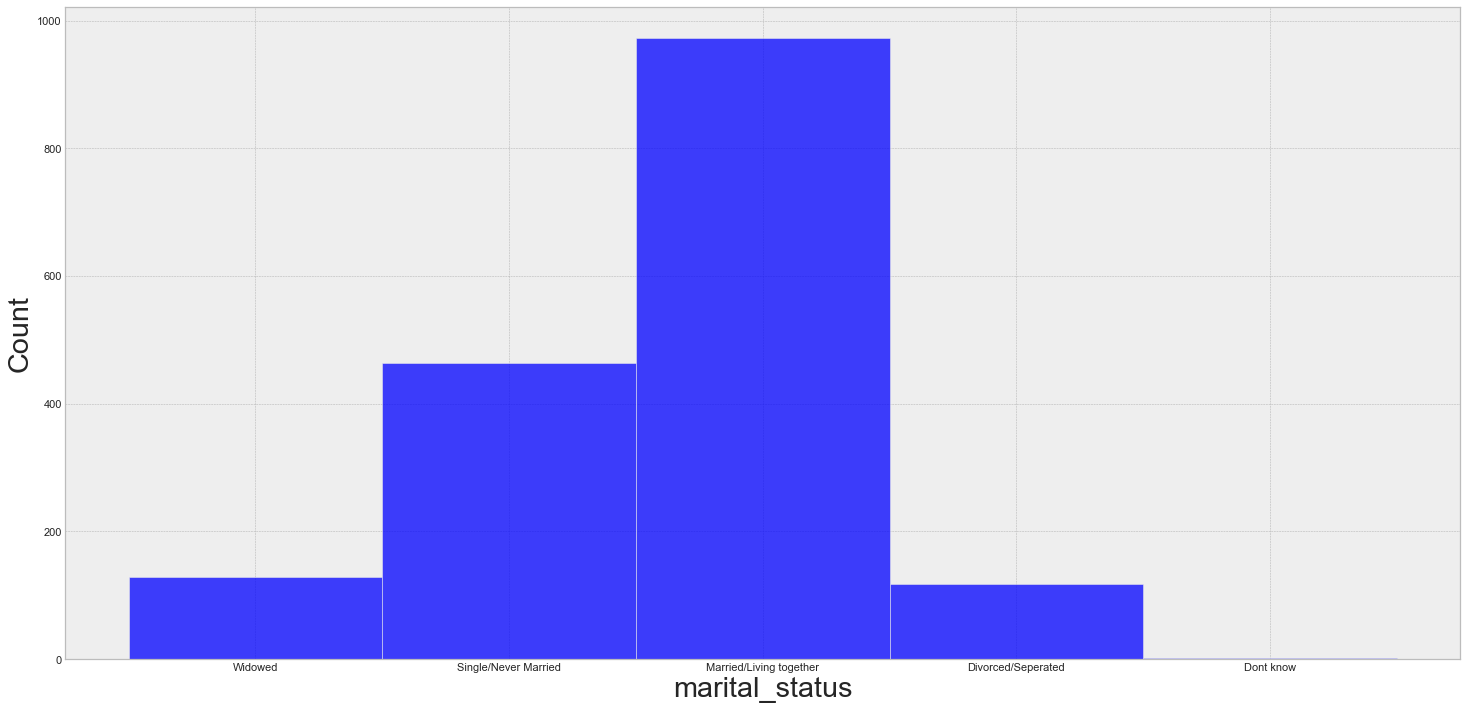

In [266]:
aux1 = df4.loc[df4["bank_account"]==1, "marital_status"]
sns.histplot(aux1)

### 4.1.1 Response variable


In [35]:
#porcentagem acima do gráfico de barras
def graphic_percentage(ax,total):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}'.format(height/total*100),
                ha="center")
    return

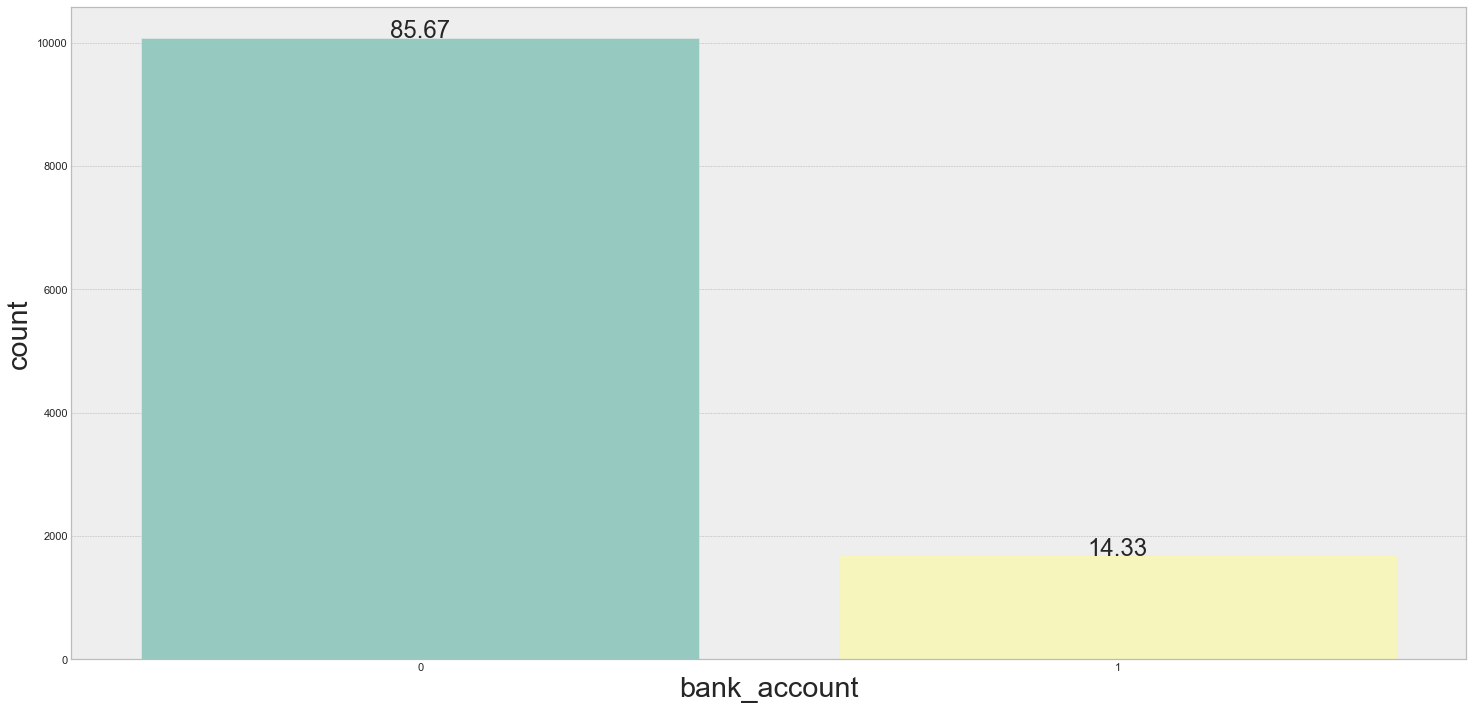

In [36]:
#distribuicão das variáveis
ax = sns.countplot(x="bank_account", data=df4, palette="Set3")
total =len(df4["bank_account"])
graphic_percentage(ax,total)

### 4.1.2 Numerical variable

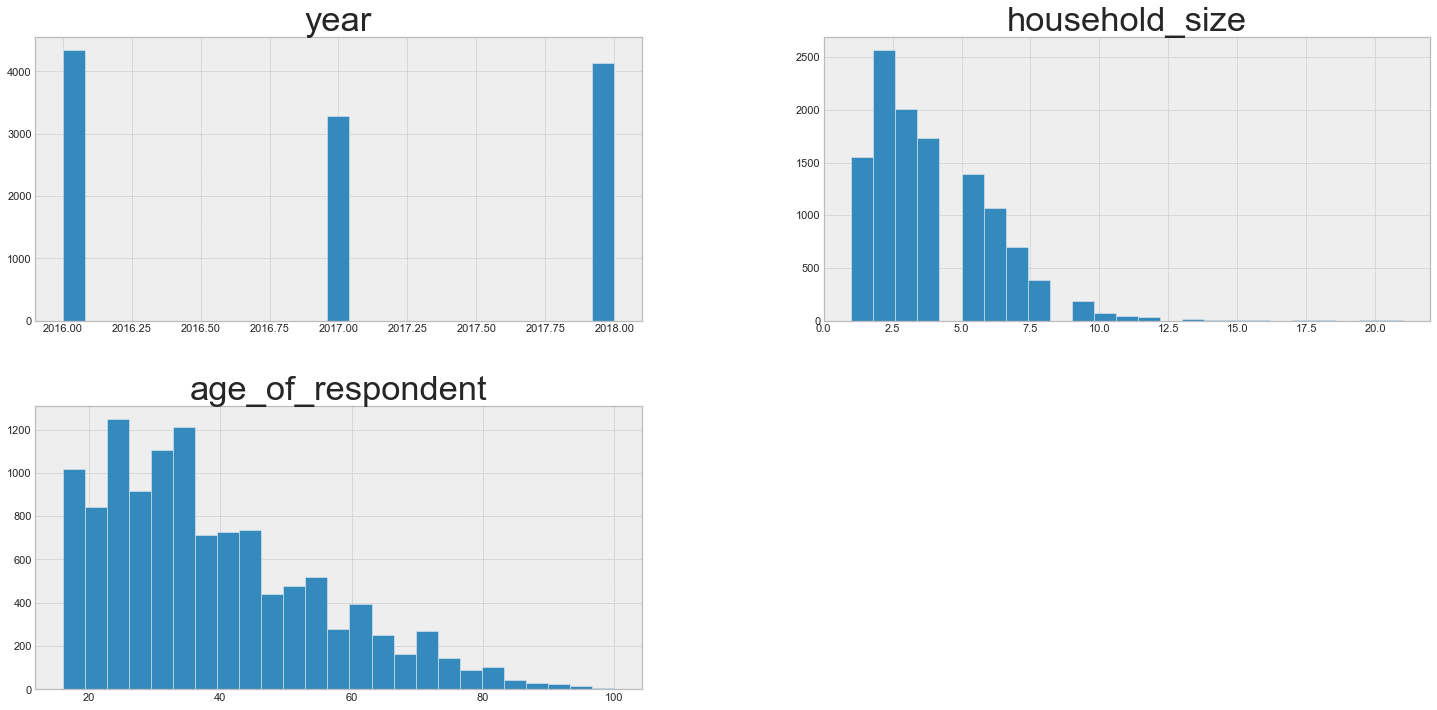

In [37]:
num_attributes.hist(bins=25);

### 4.1.3 Categorical variable

In [38]:
df4.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,uid,bank_account
0,Rwanda,2016,uniqueid_4858,Rural,1,6,45,Male,Head of Household,Divorced/Seperated,Primary education,Farming and Fishing,Rwanda_uniqueid_4858,0
1,Tanzania,2017,uniqueid_3015,Urban,0,4,33,Female,Head of Household,Single/Never Married,Primary education,Self employed,Tanzania_uniqueid_3015,0
2,Rwanda,2016,uniqueid_103,Rural,1,7,43,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing,Rwanda_uniqueid_103,0
3,Rwanda,2016,uniqueid_4582,Rural,0,6,35,Female,Head of Household,Married/Living together,Primary education,Farming and Fishing,Rwanda_uniqueid_4582,0
4,Tanzania,2017,uniqueid_2854,Urban,1,2,30,Male,Head of Household,Single/Never Married,Primary education,Informally employed,Tanzania_uniqueid_2854,0


In [39]:
df4.tail(10)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,uid,bank_account
11752,Kenya,2018,uniqueid_4427,Urban,1,1,55,Female,Head of Household,Married/Living together,Secondary education,Farming and Fishing,Kenya_uniqueid_4427,0
11753,Tanzania,2017,uniqueid_2048,Urban,1,1,47,Male,Head of Household,Married/Living together,Primary education,Informally employed,Tanzania_uniqueid_2048,0
11754,Rwanda,2016,uniqueid_198,Rural,1,4,24,Female,Spouse,Married/Living together,Secondary education,Informally employed,Rwanda_uniqueid_198,0
11755,Uganda,2018,uniqueid_696,Urban,1,3,19,Female,Spouse,Married/Living together,Primary education,Other Income,Uganda_uniqueid_696,0
11756,Rwanda,2016,uniqueid_5217,Rural,1,9,23,Male,Parent,Single/Never Married,Secondary education,Farming and Fishing,Rwanda_uniqueid_5217,0
11757,Rwanda,2016,uniqueid_5897,Rural,1,4,27,Female,Spouse,Married/Living together,Primary education,Farming and Fishing,Rwanda_uniqueid_5897,0
11758,Uganda,2018,uniqueid_153,Rural,1,9,40,Female,Spouse,Married/Living together,Primary education,Self employed,Uganda_uniqueid_153,0
11759,Kenya,2018,uniqueid_5391,Rural,1,4,35,Female,Head of Household,Widowed,Tertiary education,Formally employed Government,Kenya_uniqueid_5391,1
11760,Kenya,2018,uniqueid_861,Urban,1,2,42,Male,Head of Household,Married/Living together,Tertiary education,Self employed,Kenya_uniqueid_861,1
11761,Tanzania,2017,uniqueid_993,Urban,0,2,80,Male,Head of Household,Single/Never Married,No formal education,Self employed,Tanzania_uniqueid_993,0


/Users/raquelrocha/opt/anaconda3/envs/inclusaofinanceira/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/raquelrocha/opt/anaconda3/envs/inclusaofinanceira/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/raquelrocha/opt/anaconda3/envs/inclusaofinanceira/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other argume

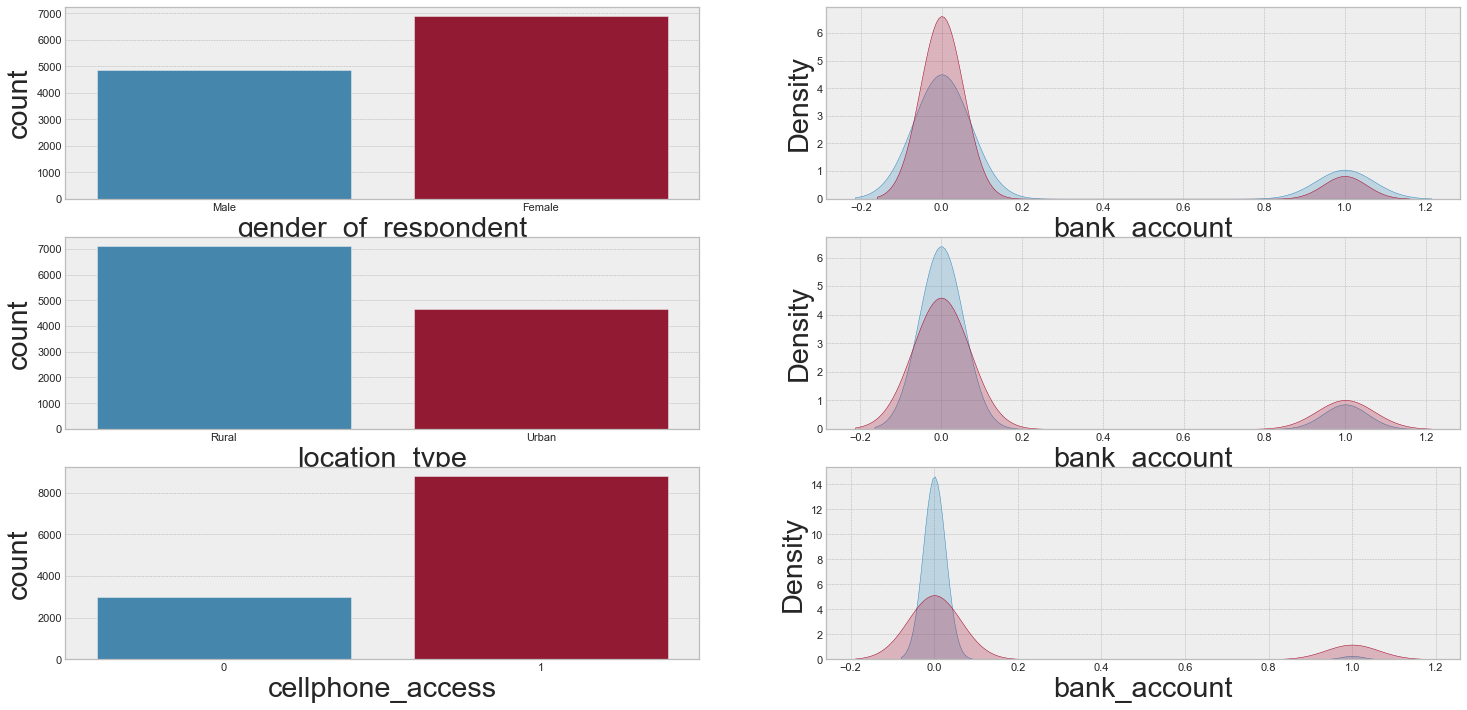

In [40]:
# seleciona apenas as variáveis categóricas para olhar os gráficos comparativos

# ver somente "gender_of_respondent" na variável response (shade deixa o gráfico mais transparente para sobrepor dois gráficos e ver melhor as comparações)
plt.subplot(3,2,1)
sns.countplot(df4["gender_of_respondent"]);

plt.subplot(3,2,2)
sns.kdeplot (df4[df4["gender_of_respondent"] == "Male" ]["bank_account"], label="Male", shade=True);
sns.kdeplot (df4[df4["gender_of_respondent"] == "Female" ]["bank_account"], label="Male", shade=True);

# ver somente "location_type" na variável response (shade deixa o gráfico mais transparente para sobrepor dois gráficos e ver melhor as comparações)
plt.subplot(3,2,3)
sns.countplot(df4["location_type"]);

plt.subplot(3,2,4)
sns.kdeplot (df4[df4["location_type"] == "Rural" ]["bank_account"], label="Rural", shade=True);
sns.kdeplot (df4[df4["location_type"] == "Urban" ]["bank_account"], label="Urban", shade=True);

# ver somente "cellphone_access" na variável response (shade deixa o gráfico mais transparente para sobrepor dois gráficos e ver melhor as comparações)
# P.S (3(linhas), 2(colunas), x(localizacão, 1,2,3,4...))
plt.subplot(3,2,5)
sns.countplot(df4["cellphone_access"]);

plt.subplot(3,2,6)
sns.kdeplot (df4[df4["cellphone_access"] == 0 ]["bank_account"], label="No", shade=True);
sns.kdeplot (df4[df4["cellphone_access"] == 1 ]["bank_account"], label="Yes", shade=True);

# ver somente "cellphone_access" na variável response (shade deixa o gráfico mais transparente para sobrepor dois gráficos e ver melhor as comparações)
# P.S (3(variáveis), 2(colunas), x(localizacão, 1,2,3,4...))
#plt.subplot(4,2,7)
#sns.countplot(df4["education_level"]);


#plt.subplot(4,2,8)
#sns.kdeplot (df4[df4["education_level"] == "Primary education" ]["bank_account"], label="Primary education", shade=True);
#sns.kdeplot (df4[df4["education_level"] == "Secondary education" ]["bank_account"], label="Secondary education", shade=True);
#sns.kdeplot (df4[df4["education_level"] == "Tertiary education" ]["bank_account"], label="Tertiary education", shade=True);
#sns.kdeplot (df4[df4["education_level"] == "No formal education" ]["bank_account"], label="No formal education", shade=True);



## 4.2 Análise bivariada
##### Validação das hipóteses

In [42]:
df4.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,uid,bank_account
0,Rwanda,2016,uniqueid_4858,Rural,1,6,45,Male,Head of Household,Divorced/Seperated,Primary education,Farming and Fishing,Rwanda_uniqueid_4858,0
1,Tanzania,2017,uniqueid_3015,Urban,0,4,33,Female,Head of Household,Single/Never Married,Primary education,Self employed,Tanzania_uniqueid_3015,0
2,Rwanda,2016,uniqueid_103,Rural,1,7,43,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing,Rwanda_uniqueid_103,0
3,Rwanda,2016,uniqueid_4582,Rural,0,6,35,Female,Head of Household,Married/Living together,Primary education,Farming and Fishing,Rwanda_uniqueid_4582,0
4,Tanzania,2017,uniqueid_2854,Urban,1,2,30,Male,Head of Household,Single/Never Married,Primary education,Informally employed,Tanzania_uniqueid_2854,0


1- Jovens até 30 anos tem mais acesso ao celular do que adultos acima de 30 anos.
Resposta: 

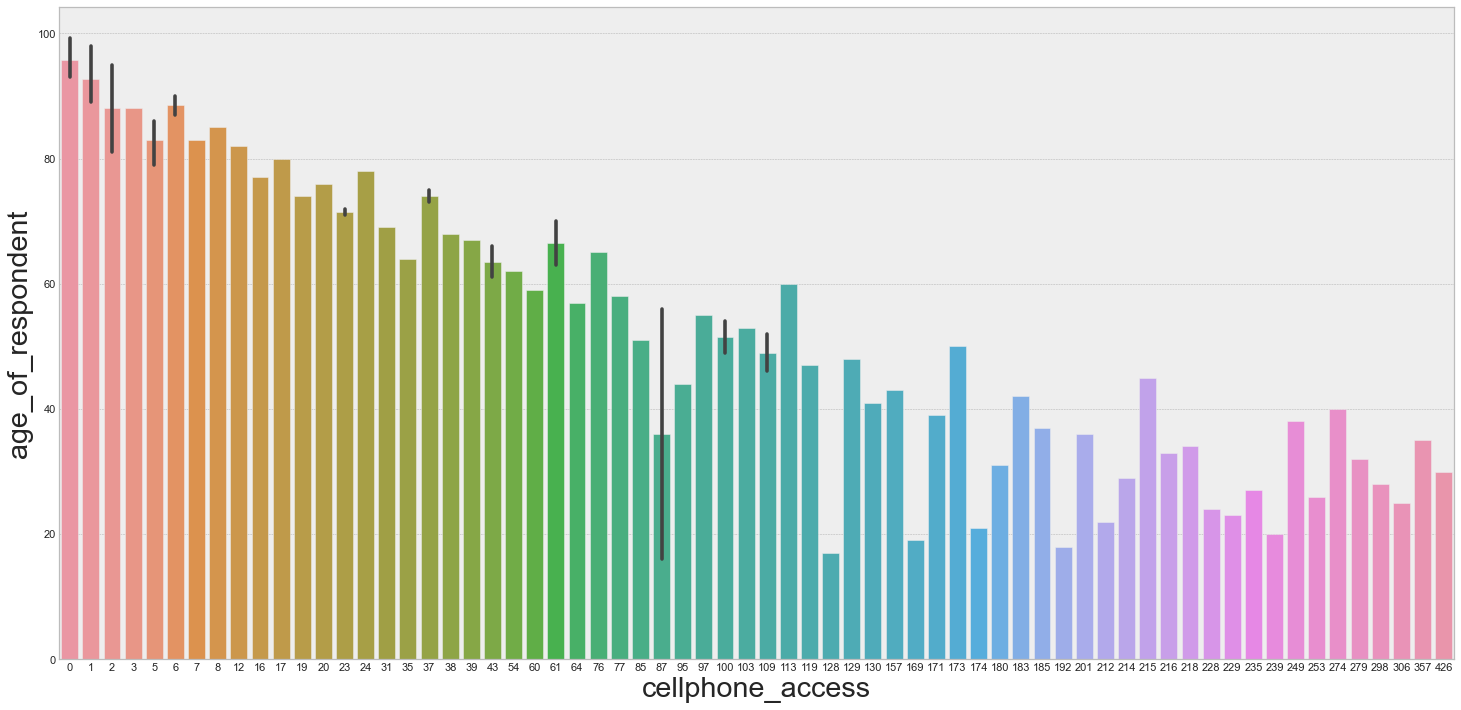

In [184]:
aux1 = df4[["age_of_respondent","cellphone_access"]].groupby("age_of_respondent").sum().reset_index()
sns.barplot(x="cellphone_access",y="age_of_respondent",data=aux1);

In [188]:
aux1 = df4[(df4["age_of_respondent"]<=30)][["cellphone_access", "bank_account"]].groupby("bank_account").sum().reset_index()
aux1

,bank_account,cellphone_access
0,0,2887
1,1,503


In [212]:
aux1 = df4[df4["age_of_respondent"]>=30].sum()
aux1

country                   RwandaTanzaniaRwandaRwandaTanzaniaKenyaTanzani...
year                                                               15611218
uniqueid                  uniqueid_4858uniqueid_3015uniqueid_103uniqueid...
location_type             RuralUrbanRuralRuralUrbanUrbanRuralRuralUrbanU...
cellphone_access                                                       5822
household_size                                                        29249
age_of_respondent                                                    362291
gender_of_respondent      MaleFemaleMaleFemaleMaleFemaleFemaleMaleFemale...
relationship_with_head    Head of HouseholdHead of HouseholdHead of Hous...
marital_status            Divorced/SeperatedSingle/Never MarriedMarried/...
education_level           Primary educationPrimary educationSecondary ed...
job_type                  Farming and FishingSelf employedFarming and Fi...
uid                       Rwanda_uniqueid_4858Tanzania_uniqueid_3015Rwan...
bank_account

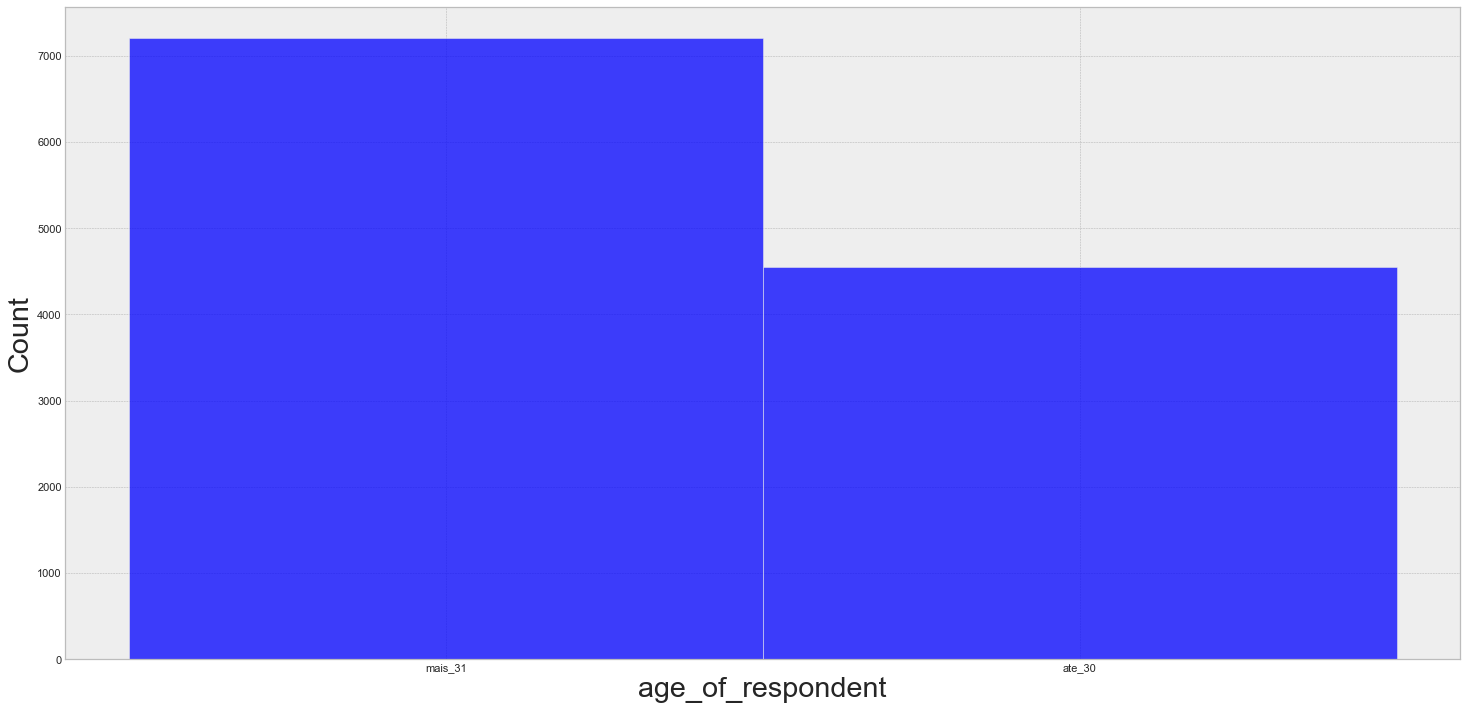

In [215]:
aux1 = df4["age_of_respondent"].apply(lambda x:"ate_30" if x <= 30 else "mais_31")
#age_of_respondent_modificado
sns.histplot(data=aux1)

In [ ]:
#VERIFICAR

#aux1 = df4[df4["age_of_respondent"]<=30].sum()
#aux11 = df4[df4["age_of_respondent"]>=31].sum()
#aux1

#aux1 = df4[(df4["age_of_respondent"]<=30)][["cellphone_access", "bank_account"]].groupby("bank_account").sum().reset_index()
#ax = aux1.plot()

#aux11 = df4[(df4["age_of_respondent"]>=31)][["cellphone_access", "bank_account"]].groupby("bank_account").sum().reset_index()
#aux11.plot(ax=ax)


In [ ]:
aux1["age_of_respondent_modificado"] = df4["age_of_respondent"].apply(lambda x:"ate_30" if x <= 30 else "mais_31")
aux2 = aux1[["age_of_respondent_modificado", "cellphone_access"]].groupby("age_of_respondent_modificado").sum().reset_index()

plt.subplot()
sns.barplot(x="age_of_respondent", y="cellphone_access", data=aux2);


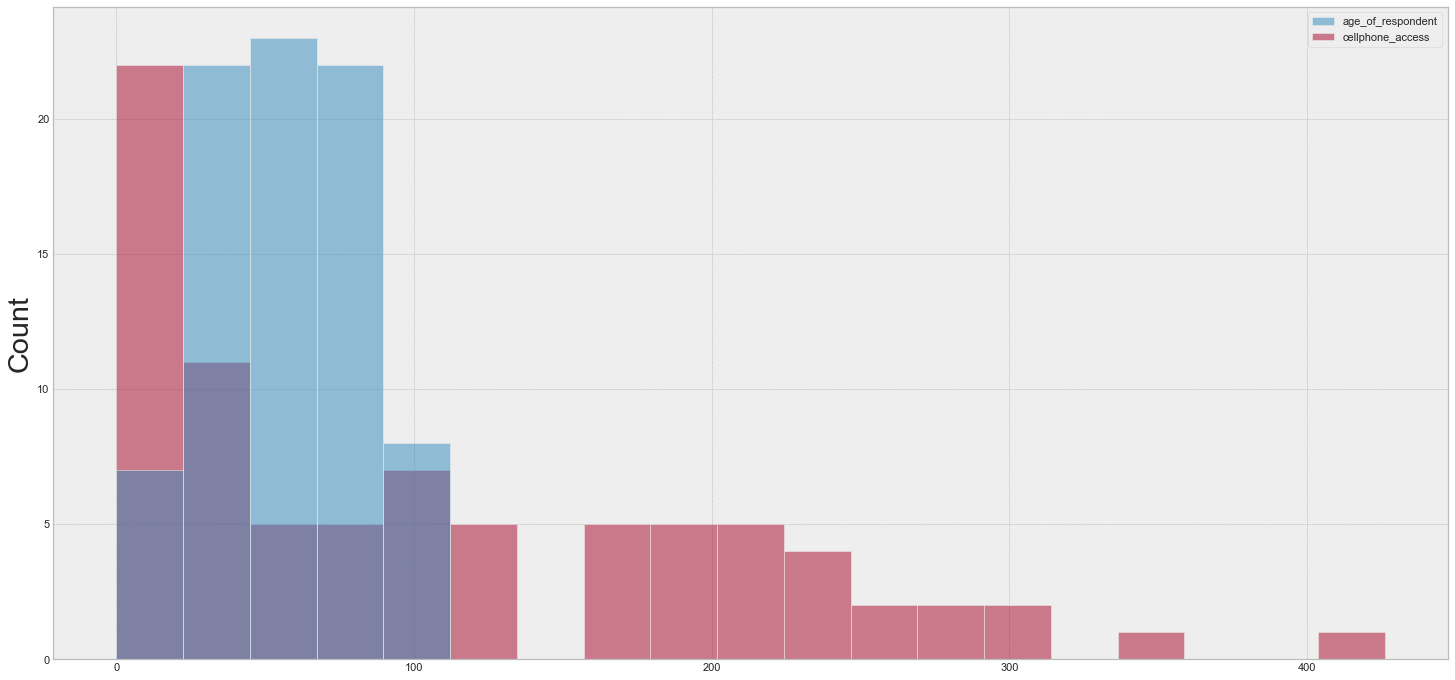

In [214]:
aux2 = df4[["cellphone_access", "age_of_respondent"]].groupby("age_of_respondent").sum().reset_index()
#aux2 
sns.histplot(aux2)

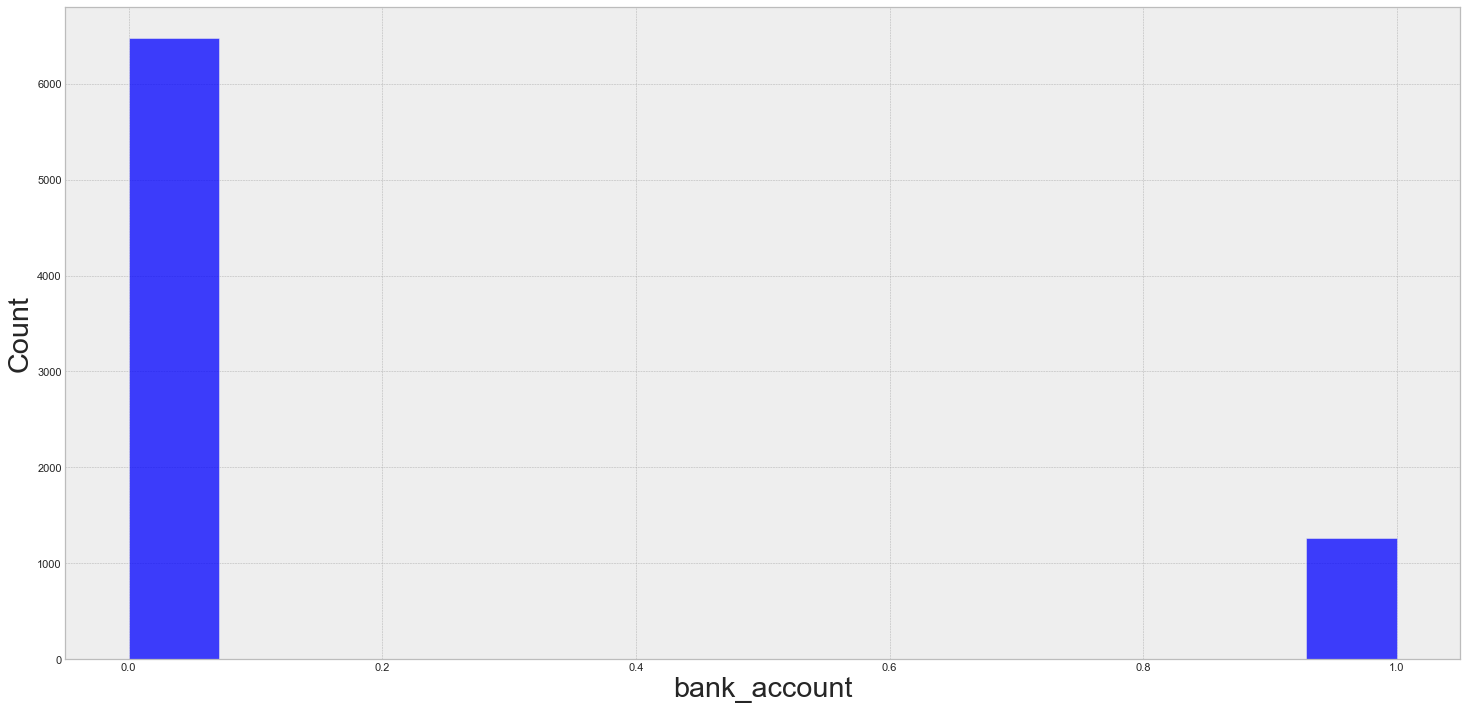

In [75]:
aux11 = df4.loc[df4["age_of_respondent"] >= 30, "age_of_respondent_modificado"]
sns.histplot(aux11)

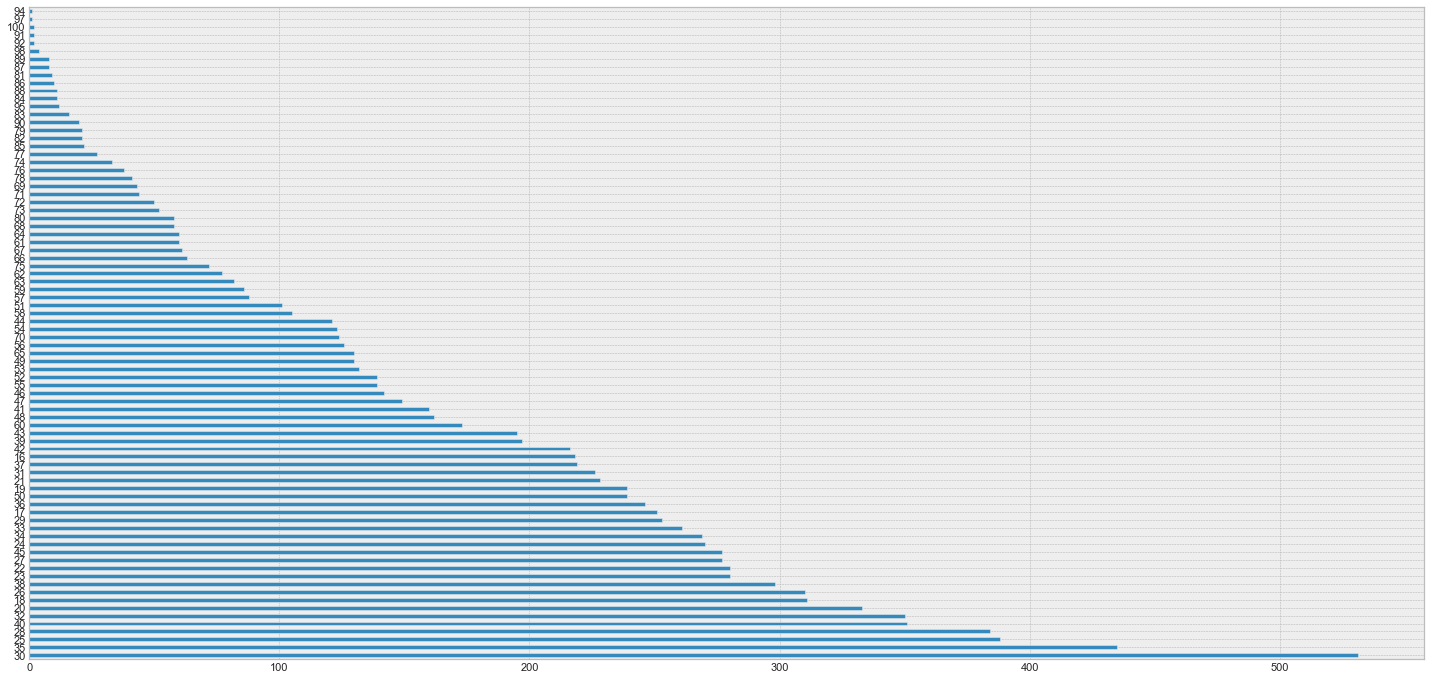

In [185]:
df4["age_of_respondent"].value_counts().plot.barh()

In [ ]:
#aux1 = df4[["age_of_respondent","cellphone_access"]].groupby("cellphone_access").sum().reset_index()

aux1 = df4[(df4["age_of_respondent"] <= "30") & (df4["age_of_respondent"] >= "31")][["age_of_respondent", "cellphone_access"]].groupby("cellphone_access").sum().reset_index()
ax = aux1.plot()


In [ ]:
2- Os jovens de 15 à 29 anos são mais propensos a utilizar serviços financeiros do que adultos de 30 à 60.
Resposta:

In [ ]:
3- Homens jovens de 15 à 29 anos utilizam mais serviços do que mulheres jovens
Resposta:

In [ ]:
4- Mulheres de localidade rural/ interior possuem menos acesso que mulheres  da area urbana, aos serviços financeiros.
Resposta:Falso

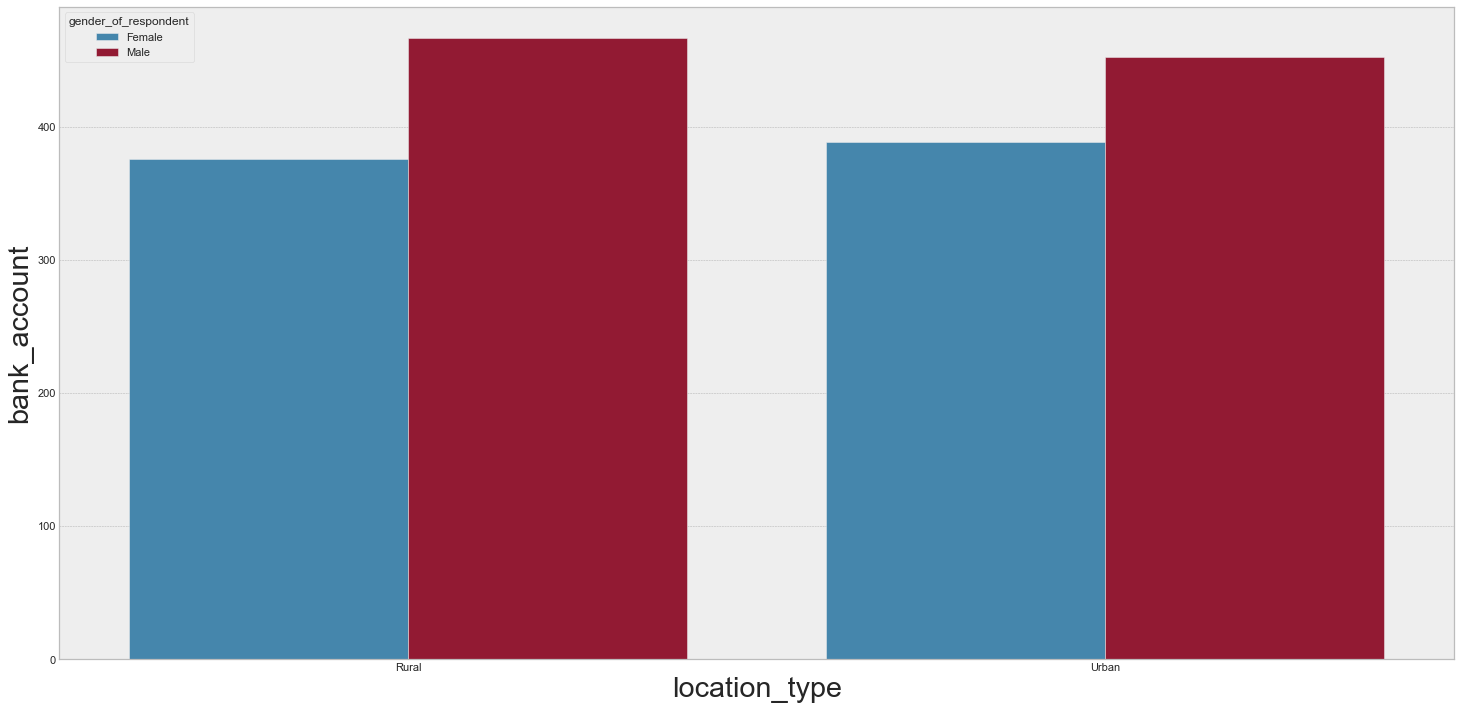

In [158]:
# Agrupar gender_of_respondent, location_type e bank_account

#aux1 = df4[["location_type", "gender_of_respondent", "bank_account"]].groupby("location_type").count().reset_index()
#sns.barplot(x="location_type", y="bank_account", data=aux1);

plt.subplot()
aux4 = df4[["location_type", "gender_of_respondent", "bank_account"]].groupby(["location_type", "gender_of_respondent"]).sum().reset_index()
sns.barplot(x="location_type", y="bank_account", hue="gender_of_respondent", data=aux4);


5- Homens de localidade rural/interior tem mais acesso a serviços bancários, do que mulheres de cidade grande/urbana
Resposta:verdadeiro

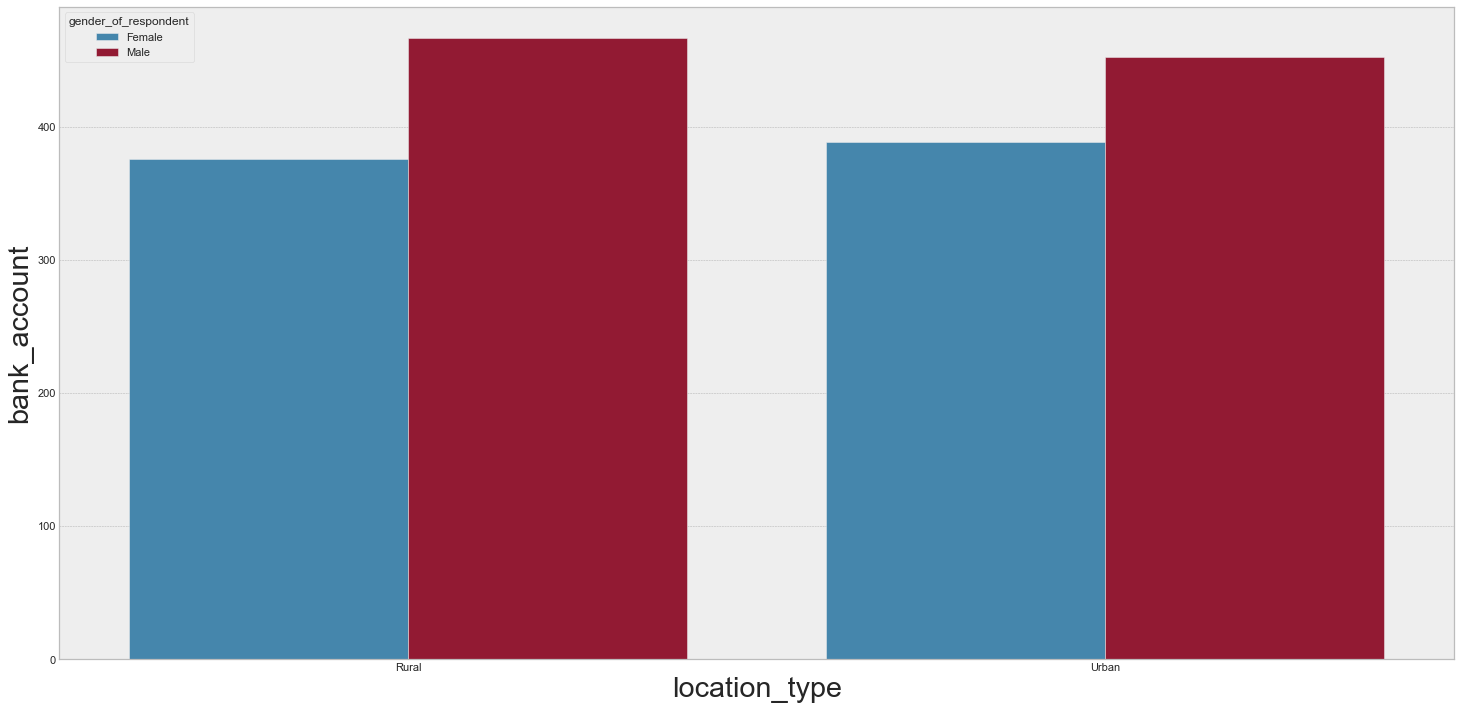

In [217]:
plt.subplot()
aux4 = df4[["location_type", "gender_of_respondent", "bank_account"]].groupby(["location_type", "gender_of_respondent"]).sum().reset_index()
sns.barplot(x="location_type", y="bank_account", hue="gender_of_respondent", data=aux4);

In [ ]:
6- O tipo de trabalho da população, entre os países da África, é um fator que restringe o acesso aos bancos.
Resposta:

In [223]:
df4.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,uid,bank_account
0,Rwanda,2016,uniqueid_4858,Rural,1,6,45,Male,Head of Household,Divorced/Seperated,Primary education,Farming and Fishing,Rwanda_uniqueid_4858,0
1,Tanzania,2017,uniqueid_3015,Urban,0,4,33,Female,Head of Household,Single/Never Married,Primary education,Self employed,Tanzania_uniqueid_3015,0
2,Rwanda,2016,uniqueid_103,Rural,1,7,43,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing,Rwanda_uniqueid_103,0
3,Rwanda,2016,uniqueid_4582,Rural,0,6,35,Female,Head of Household,Married/Living together,Primary education,Farming and Fishing,Rwanda_uniqueid_4582,0
4,Tanzania,2017,uniqueid_2854,Urban,1,2,30,Male,Head of Household,Single/Never Married,Primary education,Informally employed,Tanzania_uniqueid_2854,0


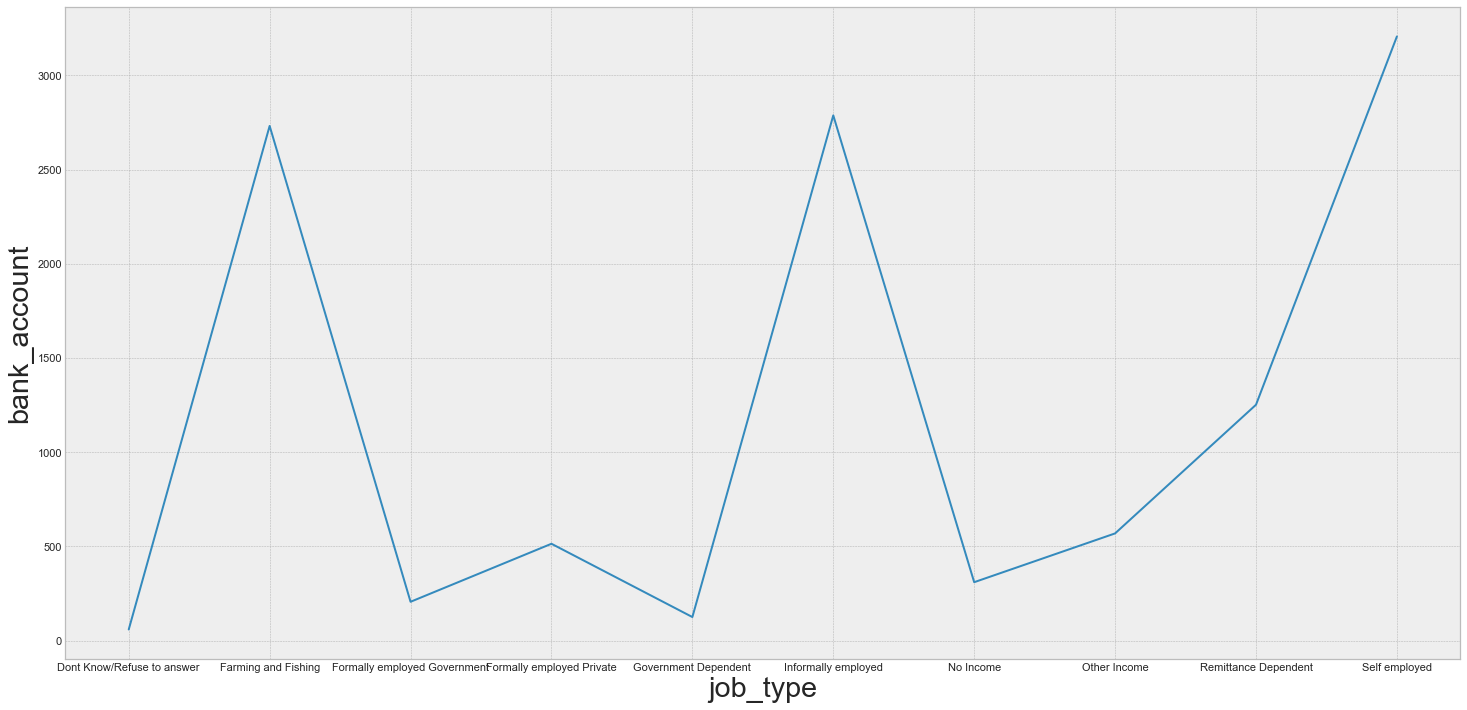

In [220]:
aux1 = df4[["job_type", "bank_account"]].groupby("job_type").count().reset_index()

plt.subplot()
sns.lineplot(x="job_type",y="bank_account",data=aux1);

In [ ]:
7- Pessoas que não tem emprego formal tem menos interesse aos serviços financeiros.
Resposta:Falso

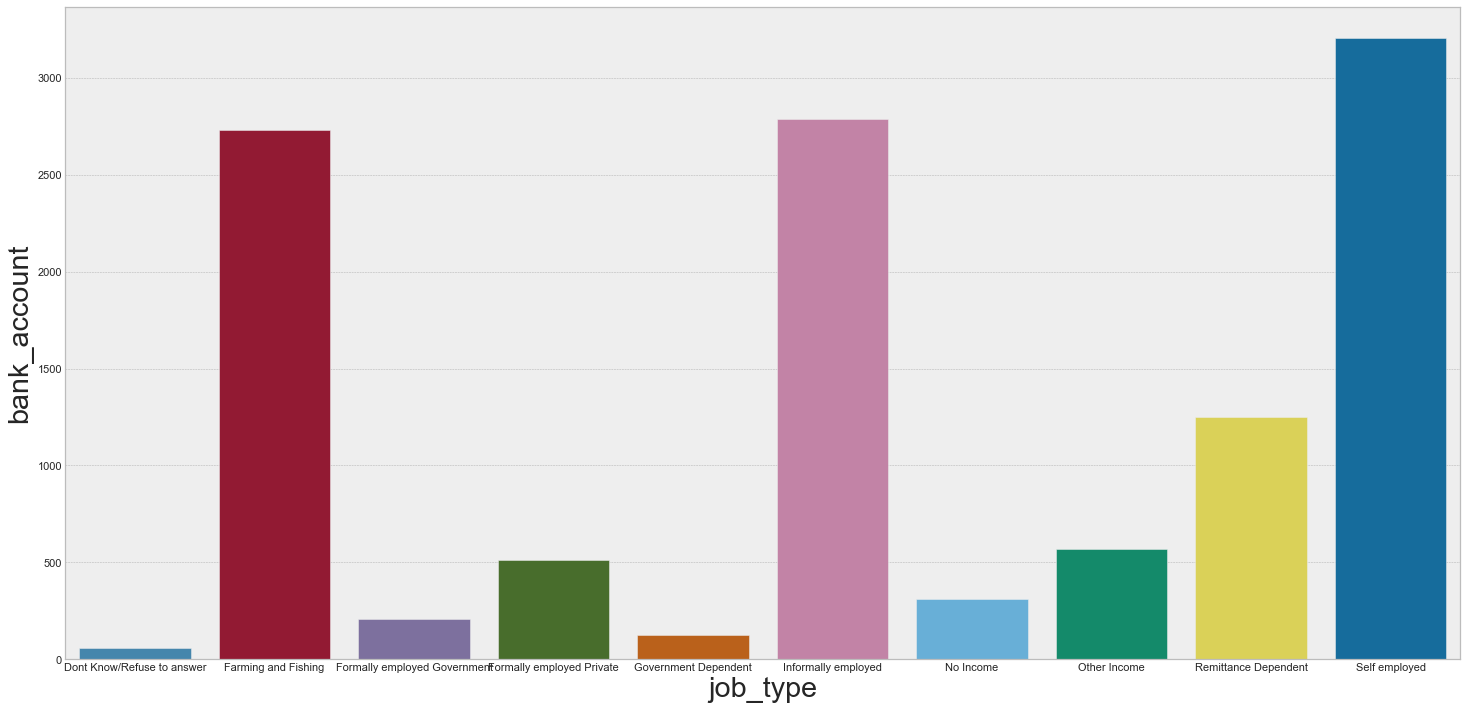

In [121]:
aux7 = df4[["job_type", "bank_account"]].groupby("job_type").count().reset_index()
sns.barplot(x="job_type", y="bank_account", data=aux7);

In [ ]:
8- Quanto maior o tamanho da casa do indivíduo, faz com que tenha mais propensão a ter uma conta bancaria
Resposta:

In [ ]:
9- Pessoas com menos acesso ao celular tem menos aquisição a conta em bancos.
Resposta: Verdadeiro

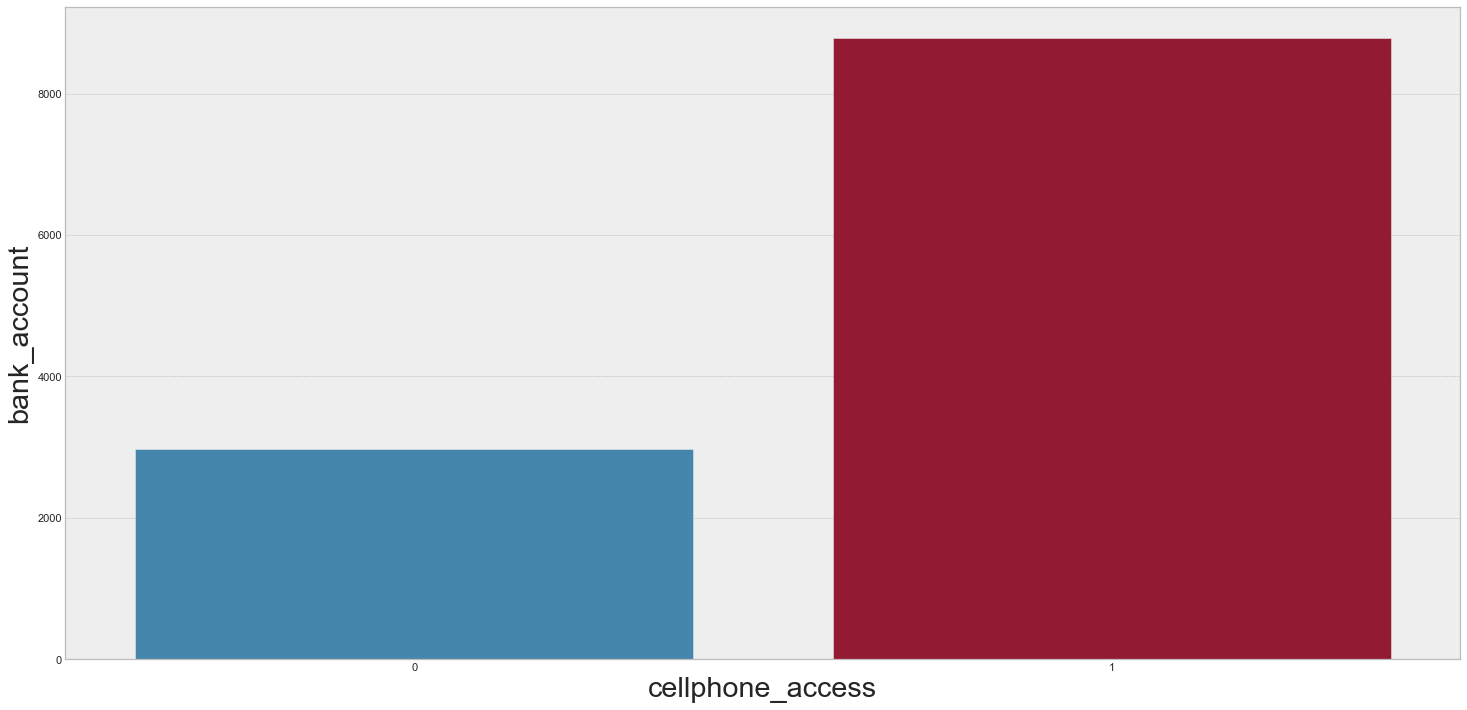

In [228]:
aux9 = df4[["cellphone_access", "bank_account"]].groupby("cellphone_access").count().reset_index()
sns.barplot(x="cellphone_access", y="bank_account", data=aux9);

In [ ]:
10- Pessoas com nível de instrução escolar maior, são mais propensas a adquirir serviços financeiros.
Resposta:

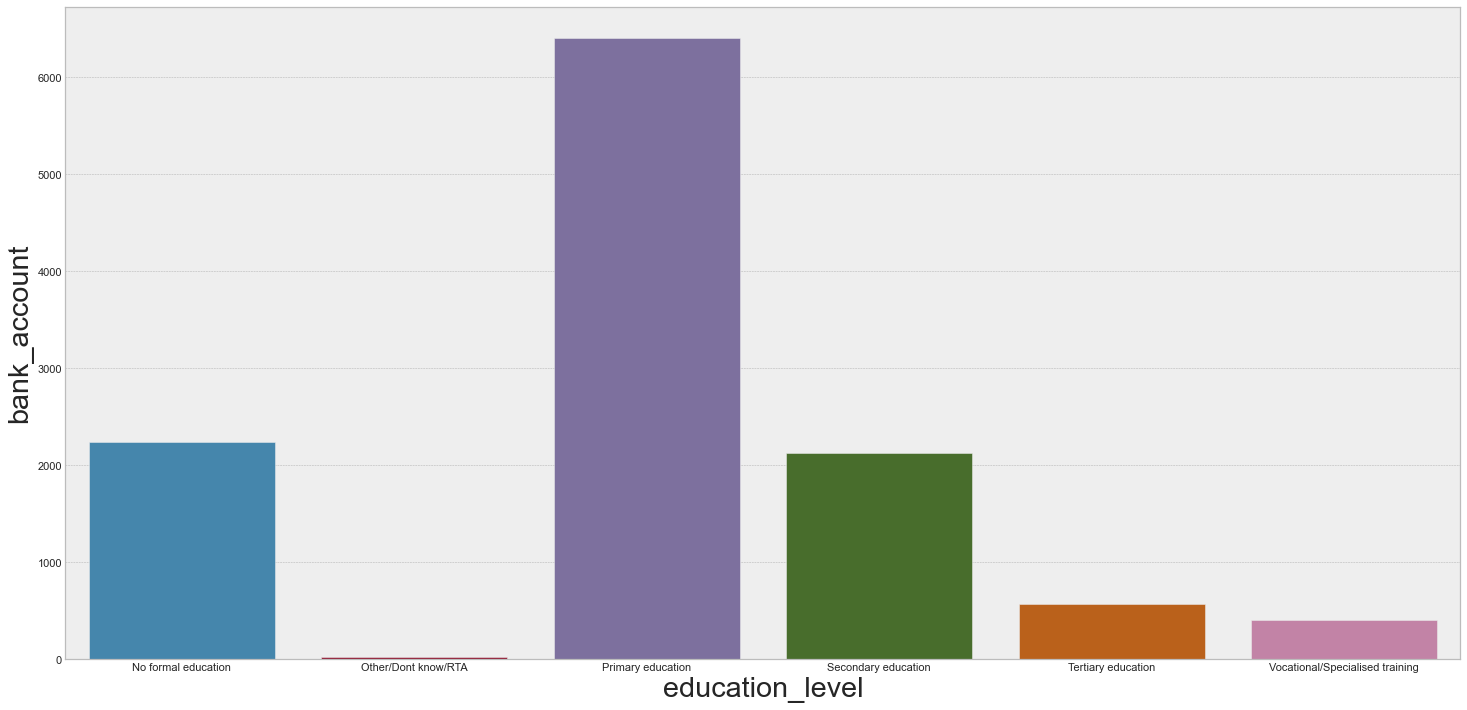

In [226]:
aux10 = df4[["education_level", "bank_account"]].groupby("education_level").count().reset_index()

plt.subplot()
sns.barplot(x="education_level",y="bank_account",data=aux10);

In [ ]:
11- Pessoas casadas tendem a ter serviços financeiros.
Resposta:

## 4.2.1 Resumo das Hipóteses

In [ ]:
#

tab =[['Hipoteses', 'Conclusao', 'Relevancia'],
      ['H1', 'Falsa', 'Baixa'],
      ['H2', 'Falsa', 'Media'],
      ['H3', 'Falsa', 'Media'],
      ['H4', 'Falsa', 'Baixa'],
      ['H5', '-', '-'],
      ['H6', 'Falsa', 'Baixa'],
      ['H7', 'Falsa', 'Media'],
      ['H8', 'Falsa', 'Alta'],
      ['H9', 'Falsa', 'Alta'],
      ['H10', 'Verdadeira', 'Alta'],
      ['H11', 'Verdadeira', 'Alta'],
    ]

print( tabulate( tab, headers='firstrow' ) )

## 4.3 Análise Multivariada


### 4.3.1 Numerical Attributes

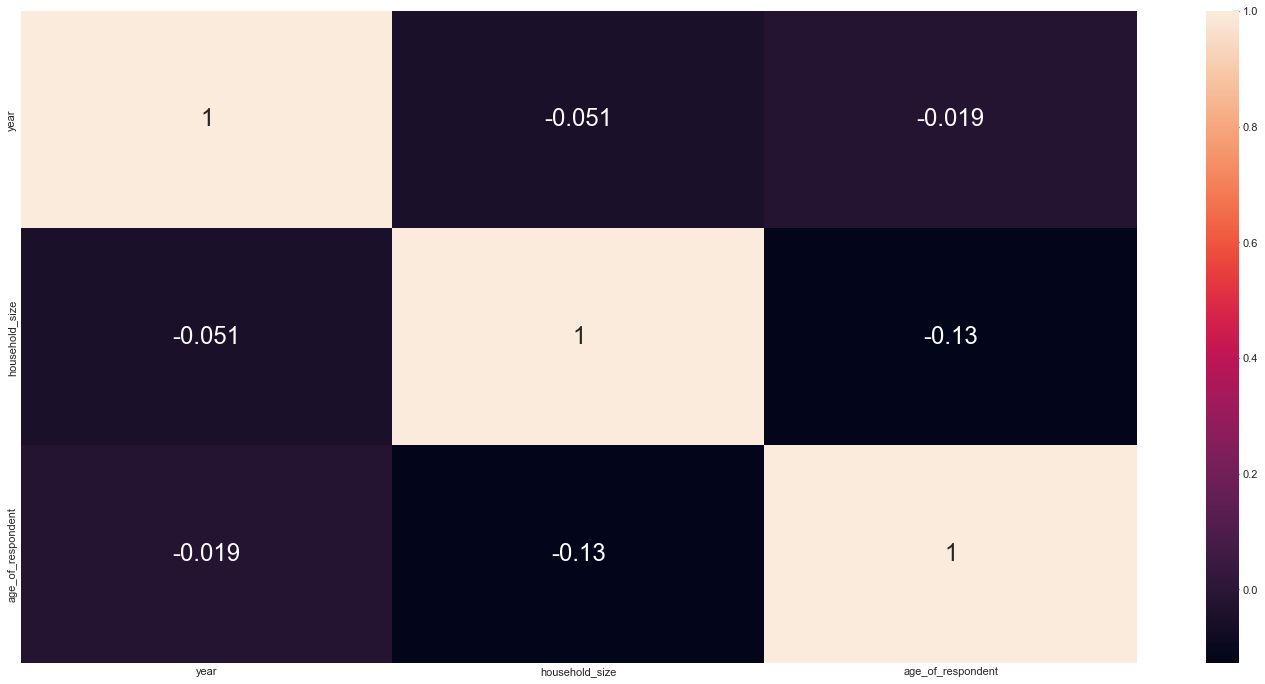

In [242]:
# correlação entre as variáveis
correlation=num_attributes.corr(method="pearson")
sns.heatmap(correlation, annot=True);

### 4.3.2 Categorical Attributes

In [243]:
def cramer_v( x, y):
    cm = pd.crosstab(x, y).to_numpy()
    n = cm.sum()
    r,k = cm.shape
    
    chi2 = stats.chi2_contingency(cm)[0]
    chi2corr = max(0 , chi2 - (k-1)*(r-1)/(n-1))
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
   
    return np.sqrt( (chi2corr/n) / (min( kcorr-1, rcorr-1 ) ) )  

def cramers_v_df(categorical_features):

    rows= []

    for var1 in categorical_features:

        col = []

        for var2 in categorical_features:
            cramers =cramer_v(categorical_features[var1], categorical_features[var2]) 
            col.append(round(cramers,3)) 

        rows.append(col)

    cramers_results = np.array(rows)
    df = pd.DataFrame(cramers_results, columns=categorical_features.columns, index=categorical_features.columns)

    return df

/var/folders/gn/t1crthwn7p10b7y02mgthdpc0000gn/T/ipykernel_5126/1394567844.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(cramer_v_dataframe, dtype=np.bool)


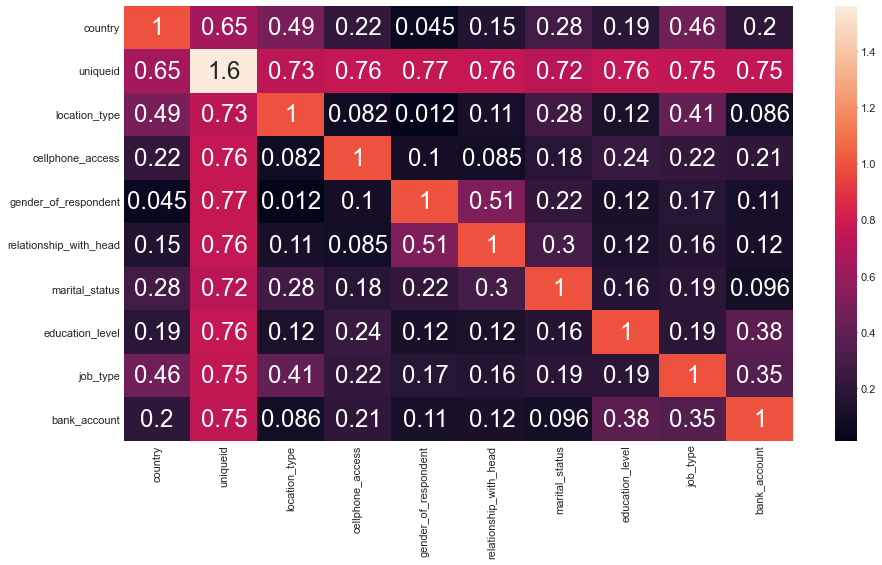

In [244]:
cat_features = cat_attributes

# dataframe with cramer-v 
cramer_v_dataframe = cramers_v_df(cat_features)

# create a mask
mask = np.zeros_like(cramer_v_dataframe, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# display heatmap
plt.subplots(figsize=(15, 8))
sns.heatmap( cramer_v_dataframe, annot = True);

#esse abaixo muda o formato do gráfico de correlação
#sns.heatmap( cramer_v_dataframe, annot = True, mask=mask);

# 5.0 Data Preparation


In [251]:
df5 = df4.copy()

In [252]:
#separando dados para treino e test

X = df4.drop("bank_account", axis=1) #aqui retiro a feature response
y = df4["bank_account"].copy() #aqui adiciono a feature a variável y 

#separando em treino e validação
x_train, x_validation, y_train, y_validation = mms.train_test_split( X, y, test_size=0.20)

#concatenar o x_train e o y_train e colocar em df5
df5 = pd.concat([x_train, y_train], axis=1)



In [253]:
df4.columns

Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'uid', 'bank_account'],
      dtype='object')

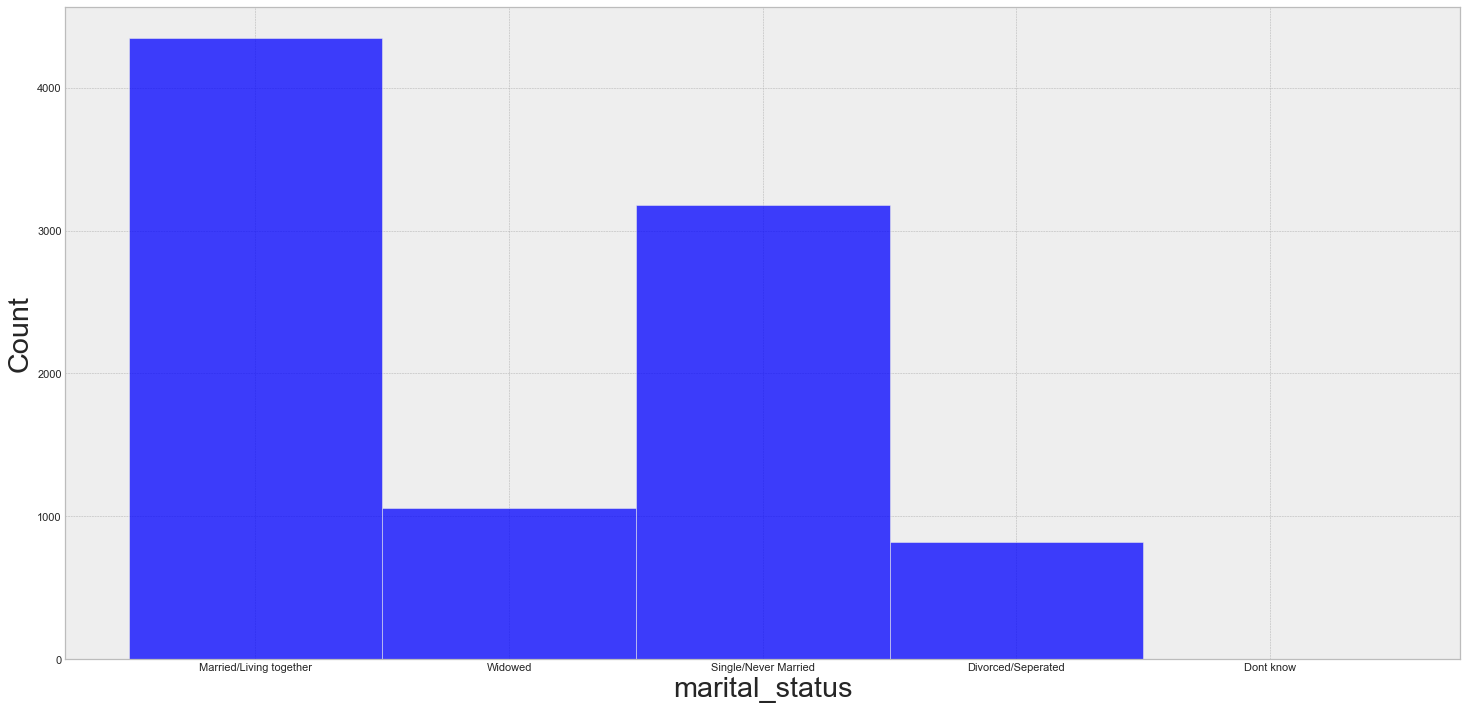

In [256]:
#aqui vemos onde colocaremos cada feature nas etapas abaixo
sns.histplot(df5["marital_status"]) #aqui é só ir trocando o nome da váriavel


## 5.1 Normalização
##### ( calcula a média e o desvio padrão)

In [ ]:
ss = pp.StandardScaler()
df5["nome da feature"] = ss.fit_transform(df5[["nome da feature"]].values) # o que está dentro de [[]] me passa um array


## 5.2 Rescaling
##### (Quando faz reescala dos intervalos, ficando em 0 e 1 )

## 5.3 Encoder
##### (quando mudamos o tipo de variável de categórica para númerica,  respeitando no máximo sua natureza )

In [ ]:

#region_code 
#Label Encoding (mapeia se tem ou não tem Ex: 0 e 1)

#One Hot Encoding (identifica um estado Ex:0 e 1), nesse caso tem 52 (não indicado)
#P.S. quando tem muitos(acima de 6/7) níveis em sua variável categórica, se usar uma hot encoding irá criar muitas dimensões no dataset que a amostra de dimensionalidade irá acabar com o modelo

#aqui podemos usar qualquer um desses, o Meigarom indica o Target Encoding, no prmeiro ciclo 
#Frequency Encoding (conta a frequência, quantas pessoas tem a licença por classe)
#Target Encoding (calcula a média, de quantas pessoas tem a licença e divide pelo total de pessoas daquele grupo)
#Weighted Target Encoding (dar peso manual para a variável Ex: quanto maior o peso mais próximo fica da média, e quanto menor o peso fica mais distante da média)


#previously_insurence - essa feature já está em 0 e 1 então já está "encodado"


#vehicle_age
#Order Encoding (mapeia a ordem ex: 2 anos seria 2x de 1 ano, e 3 anos seria 3x de 1 ano e assim vai)
#One Hot Encoding (identifica um estado Ex: velho e novo)
#Frequency Encoding (conta a frequência, quantos carros que são velhos, quantos carros que são novos)


#vehicle_damage - essa feature já está em 0 e 1 então já está "encodado"


#policy_sales_channel
#Frequency Encoding (conta a frequência, qual tipo de contato o cliente quer ter)
#Target Encoding (calcula a média, de quantas pessoas tem a licença e divide pelo total de pessoas daquele grupo)

#P.S. função Get_dummys (pandas), é igual ao Hot Encoding


In [ ]:
#aplicando o encoding

#gender
target_encode_gender = df5.groupby("gender")["response"].mean()
df5.loc[:, "gender"] = df5["gender"].map(target_encode_gender)

#region_code
#P.S. target encode tb conhecido como Mean Encoding
target_encode_region_code = df5.groupby("region_code")["response"].mean()
df5.loc[:,"region_code"] = df5["region_code"].map(target_encode_region_code)

#vehicle_age - Get_dummys
#aqui não usamos o pickle pq usamos o pandas para fazer a transformação
df5 = pd.get_dummies(df5, prefix="vehicle_age", columns=["vehicle_age"])

#policy_sales_channel - Frequency Encoding
fe_policy_sales_channel = df5.groupby("policy_sales_channel").size()/len(df5)
df5.loc[:, "policy_sales_channel"] = df5["policy_sales_channel"].map(fe_policy_sales_channel)
